In [1]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import sklearn
import sklearn.decomposition
import sklearn.manifold
import numpy as np
import pydot
import graphviz
import matplotlib.pyplot as plt
import matplotlib

from occ.occ import *
from occ.occ_flat import *

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


# MNIST data load

In [2]:
### MNIST
(train_images, train_y), (test_images, test_y) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

# Normalizing the images to the range of [0., 1.]
train_images /= 255.
test_images /= 255.

BATCH_SIZE = 25
# Binarization
train_images[train_images >= .5] = 1.
train_images[train_images < .5] = 0.
test_images[test_images >= .5] = 1.
test_images[test_images < .5] = 0.

# Train models

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

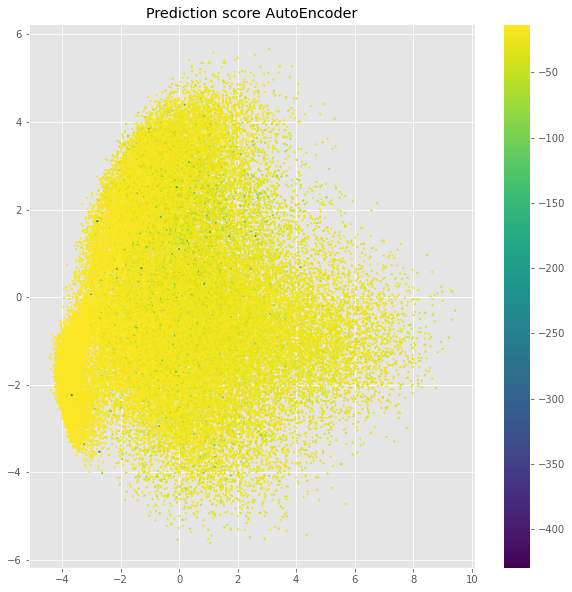

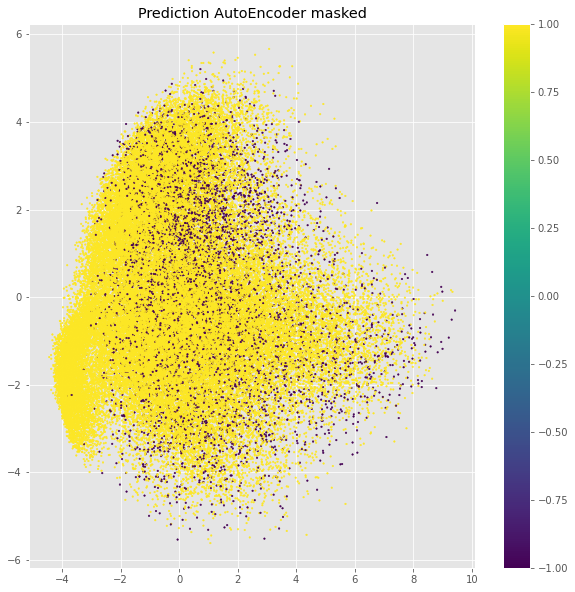

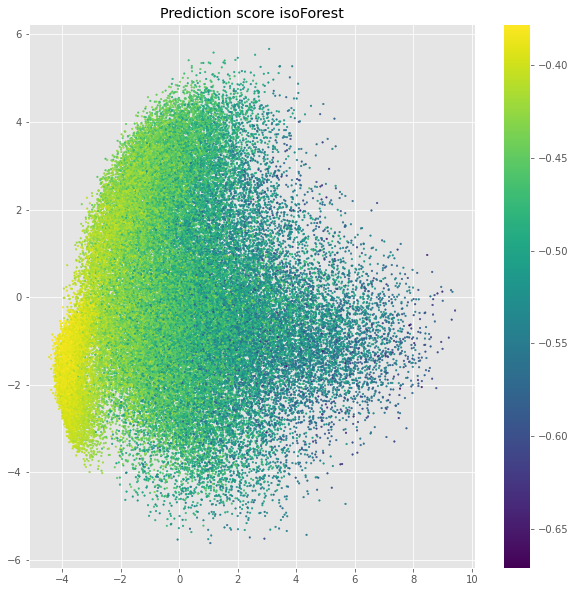

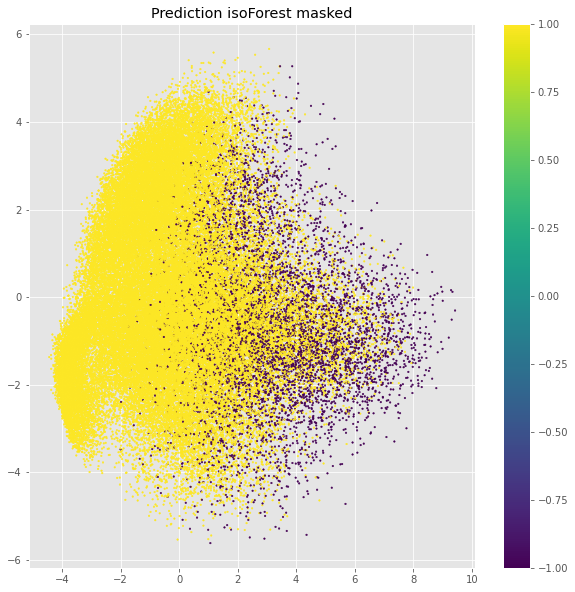

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100352    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16384     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8192      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0     

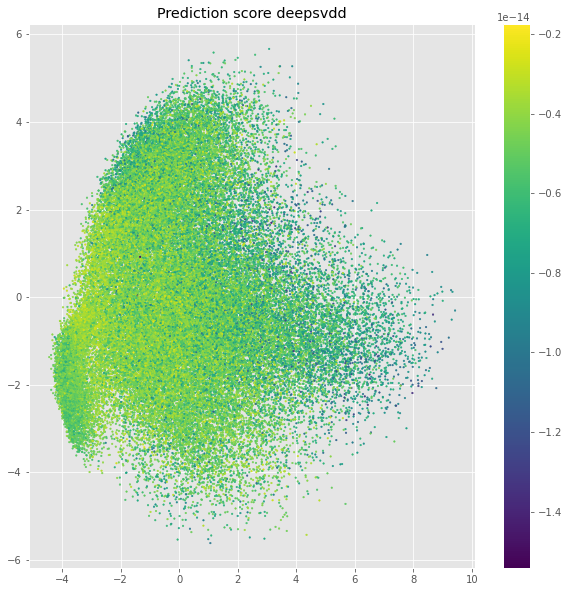

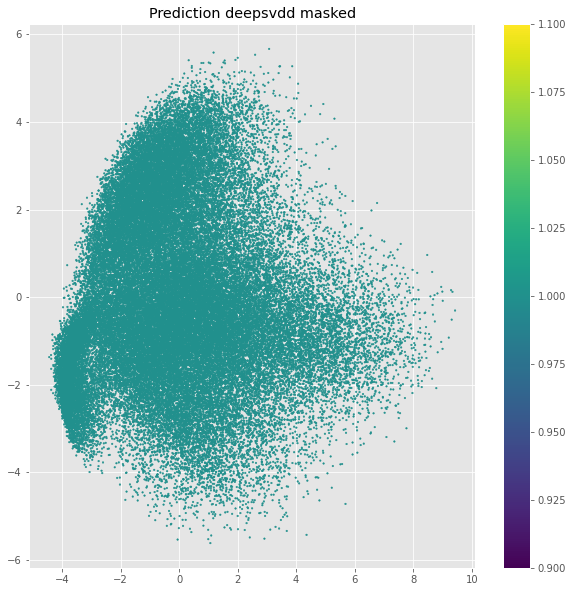

In [3]:
autoEncoder = occ_flat(train_images)
autoEncoder.train(model='autoEncoder', hidden_neurons=[64,32,16,8,16,32,64], epochs=10, batch_size=32)
Y_hat = autoEncoder.predict()
Y_score_autoEncoder = autoEncoder.get_score()
autoEncoder.show_projection(autoEncoder.X, Y_score_autoEncoder, title="Prediction score AutoEncoder", markersize=10)
occ.show_projection(autoEncoder.X, Y_hat, title="Prediction AutoEncoder masked", markersize=10)

isoForest = occ_flat(train_images)
isoForest.train(model='isoForest')
Y_hat = isoForest.predict()
Y_score_isoForest = isoForest.get_score()
isoForest.show_projection(isoForest.X, Y_score_isoForest, title="Prediction score isoForest", markersize=10)
occ.show_projection(isoForest.X, Y_hat, title="Prediction isoForest masked", markersize=10)

deepsvdd = occ_flat(train_images)
deepsvdd.train(model='deepsvdd', hidden_neurons=[128,128,64,32], kernel_epochs=10, radius_epochs=20, batch_size=32)
Y_hat = deepsvdd.predict()
Y_score_deepsvdd = deepsvdd.get_score()
deepsvdd.show_projection(deepsvdd.X, Y_score_deepsvdd, title="Prediction score deepsvdd", markersize=10)
occ.show_projection(deepsvdd.X, Y_hat, title="Prediction deepsvdd masked", markersize=10)

# Show results

In [4]:
def show_result_image(occ_model, title=""):
    idx = np.argsort(occ_model.get_score(), axis=0)
    sorted_img = np.squeeze(occ_model.raw_X[idx])

    fig = plt.figure(figsize=(14,10))
    for i in range(0,30):
        ax = fig.add_subplot(5,6,(i+1))
        ax.imshow(sorted_img[i], cmap="gray")
    fig.suptitle("Abnormals {}".format(title), fontsize=25)
    plt.show()

    fig = plt.figure(figsize=(14,10))
    for i in range(0,30):
        ax = fig.add_subplot(5,6,(i+1))
        ax.imshow(sorted_img[-(i+1)], cmap="gray")
    fig.suptitle("Normals {}".format(title), fontsize=25)
    plt.show()

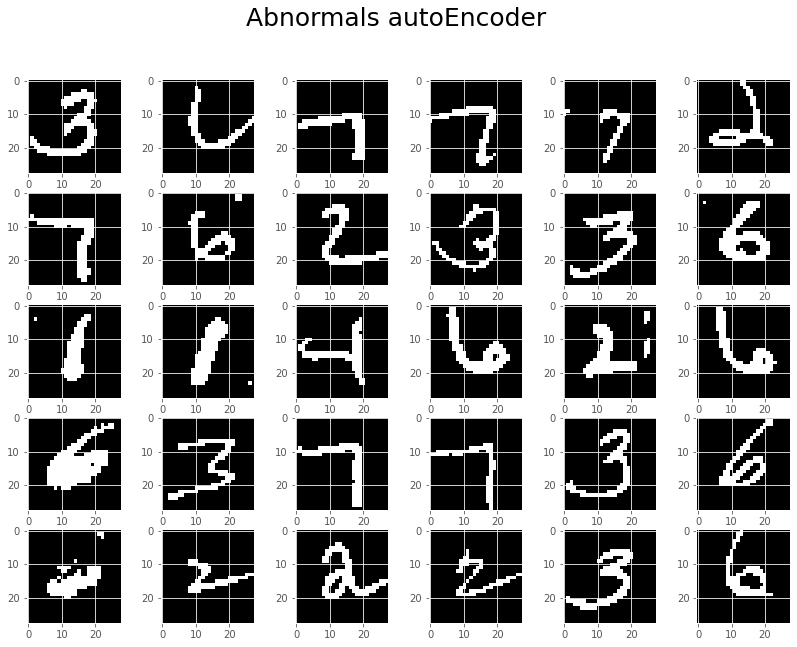

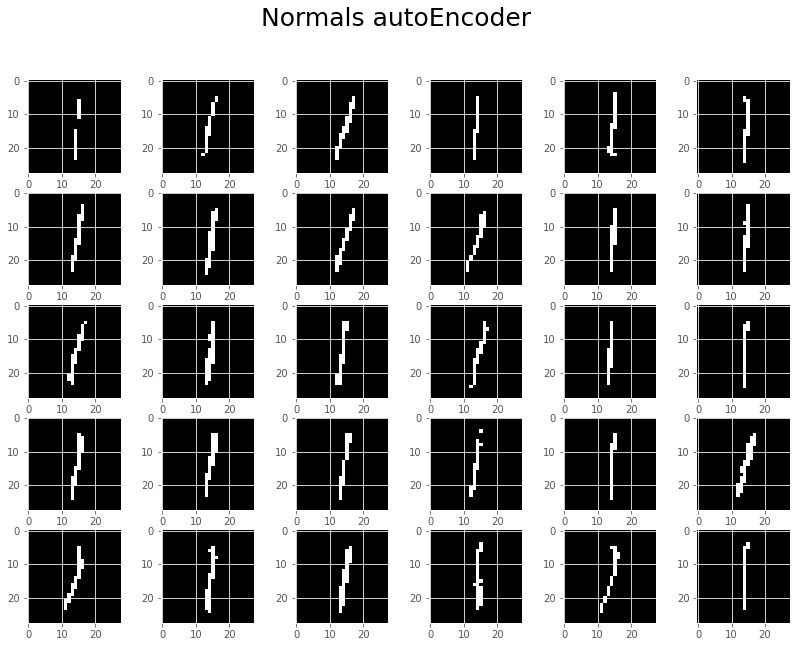

In [5]:
show_result_image(autoEncoder, title="autoEncoder")

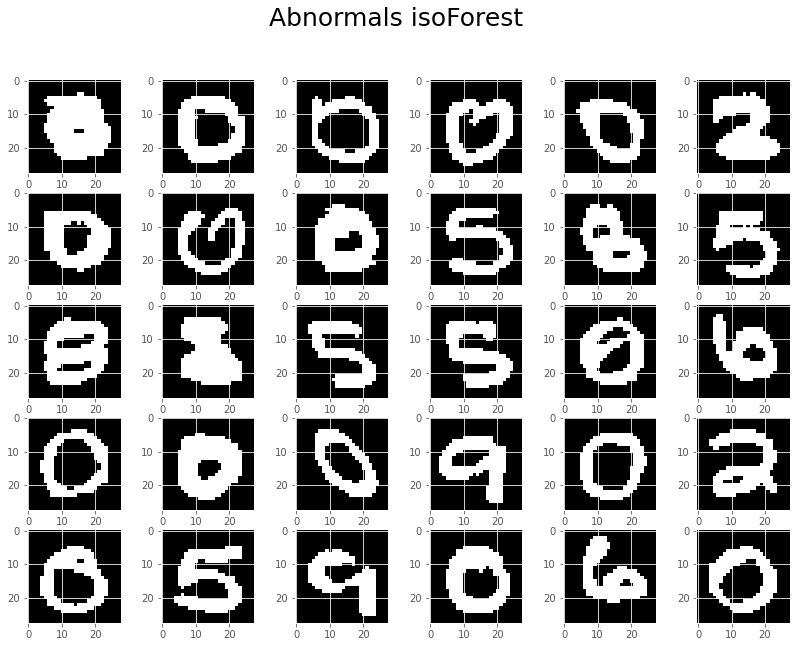

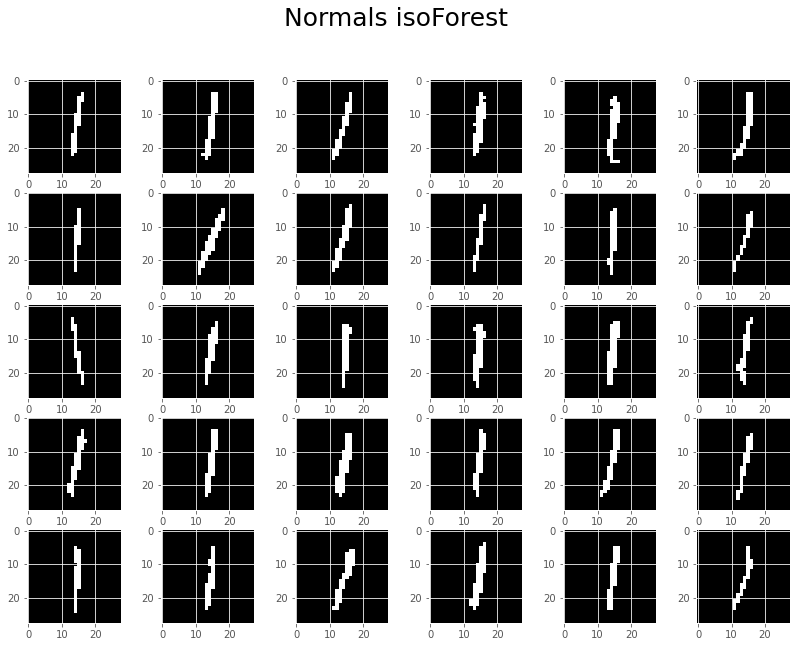

In [6]:
show_result_image(isoForest, title="isoForest")

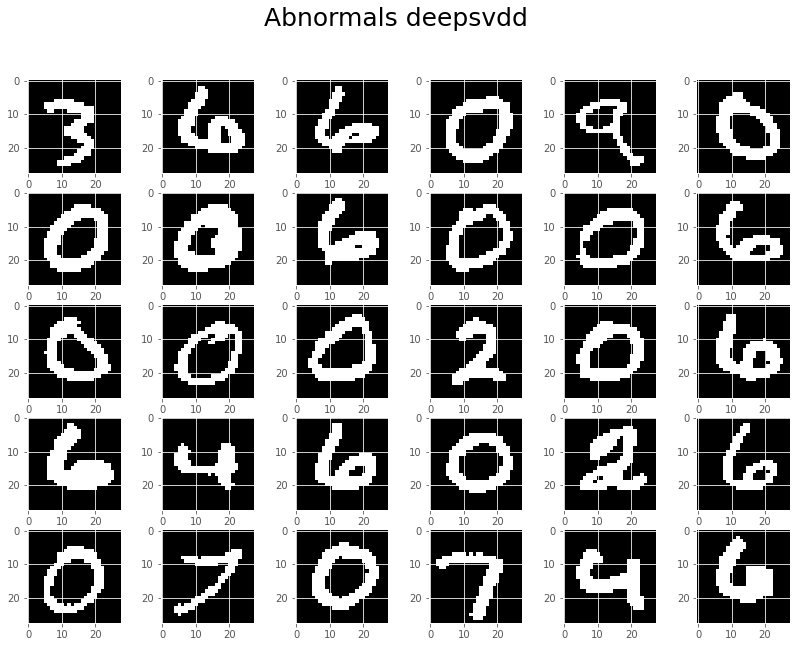

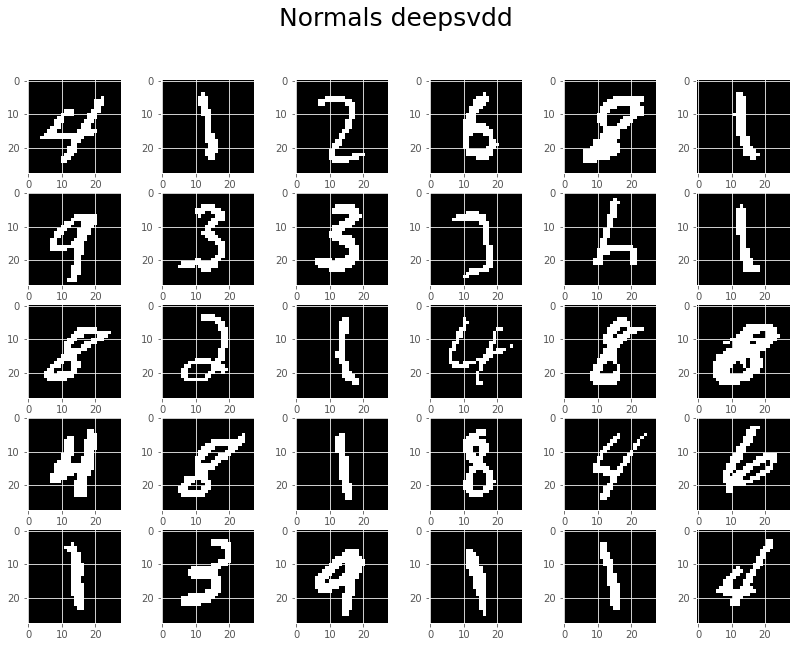

In [7]:
show_result_image(deepsvdd, title="deepsvdd")